<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : Bahar Oveis
### Student Number : 98106242
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [293]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [294]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.reg = reg
        self.alpha = alpha
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W': initializer(dim_in, dim_out),
            'b': np.zeros(dim_out)
            'W':initializer( dim_in , dim_out ),
            'b': np.zeros(dim_out),
        }
        self.grads = dict()
        self.cache = dict()
"""

        
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.alpha=alpha
        self.reg=reg
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W':initializer(dim_in , dim_out),
            'b': np.zeros(dim_out),
            
        }
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        self.cache["x"]=x
        W = self.params["W"]
        b = self.params["b"]
        y = np.dot(x, W.T) + b
        self.cache["x"]=x
        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        x = self.cache['x']
        W = self.params["W"]
        grad_w = np.dot(upstream.T, x)
        grad_reg = 2*self.alpha * W
        grad_x = np.dot(upstream, W)
        grad_b = upstream.sum(axis=0)
        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg
        }


In [295]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(y, x))
linear = LinearLayer(5, 12, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282 0.17969557 0.61131998]
 [0.90547691 0.09465278 0.04351438 0.82898441 0.53347611 0.25746229
  0.83709683 0.91589097 0.95338569 0.53886974 0.68147718 0.14543317]
 [0.36605854 0.25725115 0.64065521 0.99467217 0.84735271 0.6116583
  0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217]
 [0.48228694 0.96546312 0.48159736 0.23890255 0.62490249 0.71391215
  0.39654666 0.08349731 0.25206548 0.14235356 0.84943899 0.30579129]
 [0.18025764 0.72632517 0.07006783 0.77688796 0.90754448 0.97929669
  0.15398316 0.39885902 0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854  0.36232214 0.94163488]
 [0.10551311 0.04220206 0.55321597 0.03134844 0.82945429 0.71557495
  0.4421455  0.89943093 0.15358404 0.01888662 0.93738637 0.70363497]
 [0.2561574

#### ReLU Layer (5 Points)

In [296]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
    
        y = np.maximum(0, x)
        self.cache["y"]=y
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        
        y=self.cache["y"]
        y[y>0] = 1
        grad_x = upstream*(y)
        self.grads['x'] = grad_x


In [297]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [298]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    
    res=np.zeros((array.shape))
    for i in range (array.shape[0]):
        c=array[i,:].max()
        y=c+np.log(np.sum(np.exp(array[i,:]-c)))
        res[i,:]=y
    
    return res
    
    #########################################
    ##              Your Code              ##
    #########################################
   

In [299]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        logsumexp_val = logsumexp(x, axis=1)
        temp=np.ones((x.shape))
        
        for i in range(len(logsumexp_val)):
            temp[i]=logsumexp_val[i]*temp[i]
    
        y=x-temp
        self.cache["y"]=y
        self.cache["x"]=x
        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        softmax=np.exp(self.cache['y'])
        s_dim=softmax.shape[1]
        grad_x=np.zeros_like(upstream)
        for b in range(self.cache['y'].shape[0]):
            jac=np.eye(s_dim) - softmax[b,np.newaxis]
            grad_x[b] = np.dot(upstream[b], jac)
        self.grads['x'] = grad_x


        

In [300]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [301]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        res_x = x

        for layer in self.layers:
            res_x=layer._forward(res_x)
        return res_x
        #########################################
        ##              Your Code              ##
        #########################################
    
    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        '''
        current_upstream=upstream
        for layer in reversed(self.layers):
            layer.backward(current_upstream)
            current_upstream=layer.grads["x"]
        '''
        new_upstream = upstream
        for i in range((len(self.layers)-1), -1, -1):
            self.layers[i].backward(new_upstream)
            new_upstream =self.layers[i].grads["x"]
        return new_upstream

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """

        layers=[]
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if(hasattr(layer,"params")):
                layers.append(layer)
        
        return layers
        

## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [302]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y= -1 * np.sum( logprobs[range(targets.shape[0]),targets] )/targets.shape[0]
        self.cache['y']=y
        self.cache['logprobs']=logprobs
        self.cache['targets']=targets
        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        
        grad_scores = np.zeros((self.cache['logprobs'].shape))
        targets = self.cache['targets']
        grad_scores[range(targets.shape[0]),targets] = -1/(targets.shape[0])
        self.grads['x'] = grad_scores

In [303]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.  -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1]
 [-0.1  0.   0.   0.   0. ]
 [-0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.1]
 [ 0.  -0.1  0.   0.   0. ]
 [ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.1]]
Relative error of delta-loss:
3.327145416815998e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [304]:
class Optimizer():
    """
    Our main optimization class.
    
    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self):
        """
        Perform sgd update on all parameters of layers
        """
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if isinstance(layer , LinearLayer):
                layer.params["W"]= layer.params["W"] - layer.grads["W"]*self.lr
                layer.params["b"]= layer.params["b"] - layer.grads["b"]*self.lr
                if layer.reg:
                    layer.params["W"]=layer.params["W"] - layer.grads["reg"]*self.lr

    
    def _momentum(self):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        pass


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [305]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################

#!E:/uni/ml/Hw/ML_HW3/Practical/Q2. Neural Network/cifar10_downloader.bash


In [306]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [307]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
val_index=np.random.choice(list(range(1,4000)),1200,replace=False)

data["X_val"]=data["X_train"][val_index,:,: ]
data["Y_val"]=data["Y_train"][val_index ]
data["X_train"]=np.delete(data["X_train"],val_index, axis=0)
mask = np.ones(data["Y_train"].size, dtype=bool)
mask[val_index] = False
data["Y_train"]=data["Y_train"][mask]

##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (2800, 32, 32, 3)
Y_train: (2800,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (1200, 32, 32, 3)
Y_val: (1200,)


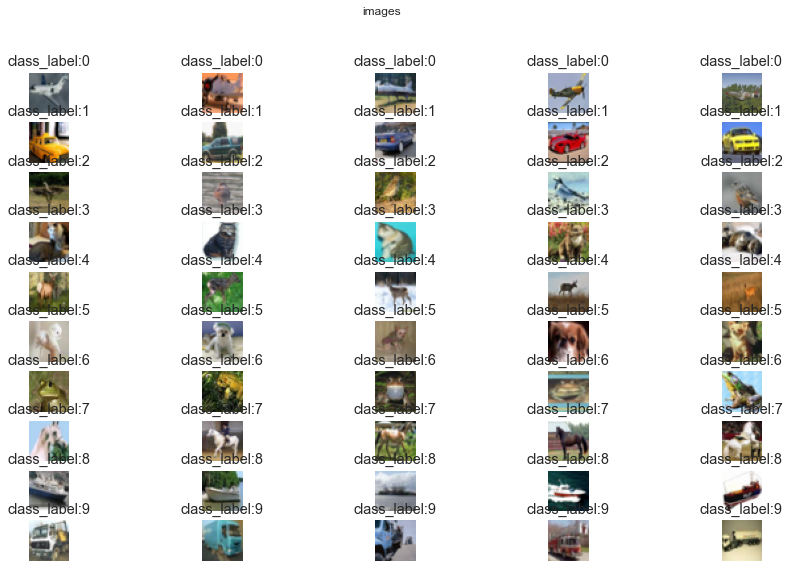

In [308]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################

labels = np.unique(data["Y_train"])
fig, ax = plt.subplots(nrows=10 , ncols=5, figsize=(15, 9))
ax = ax.flatten()
for i in labels:
   indices = np.where(data['Y_train']==i)[0]
   for j in range(5):
      ax[i*5+j].imshow(data['X_train'][indices[j]])
      ax[i*5+j].set_xticks([])
      ax[i*5+j].set_yticks([])
      ax[i*5+j].set_title("class_label:{}".format(i))
plt.suptitle("images")
plt.show()







In [309]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################
mean_X=np.mean(data["X_train"])
data["X_train_flatt"] = data["X_train"].reshape(data["X_train"].shape[0],-1) - mean_X
data["X_val_flatt"] = data["X_val"].reshape(data["X_val"].shape[0],-1) - mean_X
data["X_test_flatt"] = data["X_test"].reshape(data["X_test"].shape[0],-1) - mean_X
data["Y_train_flatt"]=data["Y_train"]
data["Y_test_flatt"]=data["Y_test"]
data["Y_val_flatt"]=data["Y_val"]
#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (2800, 32, 32, 3)
Y_train: (2800,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (1200, 32, 32, 3)
Y_val: (1200,)
X_train_flatt: (2800, 3072)
X_val_flatt: (1200, 3072)
X_test_flatt: (1000, 3072)
Y_train_flatt: (2800,)
Y_test_flatt: (1000,)
Y_val_flatt: (1200,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [310]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            type : one of {'train', 'test', 'val'}
        batch_count = int(dataset[self.x_key].shape[0]/batch_size)
        """
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        batch_count = int(dataset[self.x_key].shape[0]/batch_size)
        self.num_batches = batch_count
        self.batch_size = batch_size
        self.dataset = dataset
        self.indices = []
        self.indices = np.array(list(range(dataset[self.x_key].shape[0]))).reshape(batch_count,batch_size)



        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [311]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    #################################
    ##          Your Code          ##
    #################################

    for i in range(len(preds)):
        conf_matrix[preds[i]][reals[i]]+=1
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix
        
    Returns:
        f1 : macro f1 score
    """
    #################################
    ##          Your Code          ##
    #################################
    
    prec_classes = confusion_matrix.diagonal()/np.sum(confusion_matrix,axis=1)
    recal_classes = confusion_matrix.diagonal()/np.sum(confusion_matrix,axis=0)
    f1_classes = 2*((prec_classes*recal_classes)/(prec_classes+recal_classes))
    f1_score = np.sum(f1_classes)/f1_classes.size
    return f1_score

### Define Model
Define an MLP model to solve classification problem.

In [312]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################

initializer = lambda x, y: np.random.normal(size=(y, x))
layers = [LinearLayer(3072, 10, initializer, reg=True, alpha=.01),LogSoftMax()]
model = MLPModel(layers)


In [313]:
#########################################
##          Hyper parameters           ##
#########################################
n_epochs = 300
batch_size = 100
lr = 0.2
reg_coeff = 0.0001

In [314]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer =  Optimizer(layers,'sgd',lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size,data,"train_flatt")
val_sampler =  RandomSampler(batch_size,data,"val_flatt")
test_sampler =  RandomSampler(batch_size,data,"test_flatt")


### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [315]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            mf = model._forward(x)
            total_loss+=x.shape[0]*criterion._forward(mf, y )
            criterion.backward(1)
            model.backward(criterion.grads["x"])
            ####model updated and we find the acc and f1
            update_confusion_matrix(confusion , np.argmax(mf,axis=1) , y)
            acc = sum(confusion.diagonal())/np.sum(confusion)
            f1 = f1_score(confusion)
            N+=x.shape[0]
            optimizer.step()
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for train phase
    train_losses.append(total_loss/N)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            model_forward = model._forward(x)
            total_loss+=x.shape[0]*criterion._forward(model_forward, y)
            update_confusion_matrix(confusion , np.argmax(model_forward,axis=1) , y)
            f1 = f1_score(confusion)
            acc = sum(confusion.diagonal()) / np.sum(confusion)
            N+=x.shape[0]
            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/N)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    if best_f1 < f1 :
        best_model =copy.deepcopy(model)
        best_f1=f1

    
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

  0%|          | 0/28 [00:00<?, ?it/s]C:\Users\B6E52~1.OVE\AppData\Local\Temp/ipykernel_33744/2051838951.py:38: RuntimeWarning: invalid value encountered in true_divide
  f1_classes = 2*((prec_classes*recal_classes)/(prec_classes+recal_classes))
Train 0 | Loss:1.34e+01 | Acc: 0.15| F1: 0.14|: 100%|██████████| 28/28 [00:00<00:00, 59.16it/s]
Val   0 | Loss:1.09e+01 | Acc: 0.14| F1: 0.14|: 100%|██████████| 12/12 [00:00<00:00, 116.96it/s]


----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:8.80e+00 | Acc: 0.19| F1: 0.18|: 100%|██████████| 28/28 [00:00<00:00, 49.97it/s]
Val   1 | Loss:8.23e+00 | Acc: 0.17| F1: 0.17|: 100%|██████████| 12/12 [00:00<00:00, 193.67it/s]


----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:6.81e+00 | Acc: 0.21| F1: 0.21|: 100%|██████████| 28/28 [00:00<00:00, 65.25it/s]
Val   2 | Loss:6.62e+00 | Acc: 0.18| F1: 0.19|: 100%|██████████| 12/12 [00:00<00:00, 135.29it/s]


----------------------------[Epoch3 finished!]----------------------------


Train 3 | Loss:5.53e+00 | Acc: 0.23| F1: 0.22|: 100%|██████████| 28/28 [00:00<00:00, 66.35it/s]
Val   3 | Loss:5.50e+00 | Acc: 0.20| F1: 0.20|: 100%|██████████| 12/12 [00:00<00:00, 132.52it/s]


----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:4.60e+00 | Acc: 0.24| F1: 0.24|: 100%|██████████| 28/28 [00:00<00:00, 68.79it/s]
Val   4 | Loss:4.66e+00 | Acc: 0.20| F1: 0.21|: 100%|██████████| 12/12 [00:00<00:00, 121.81it/s]


----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:3.89e+00 | Acc: 0.26| F1: 0.25|: 100%|██████████| 28/28 [00:00<00:00, 58.19it/s]
Val   5 | Loss:4.02e+00 | Acc: 0.21| F1: 0.21|: 100%|██████████| 12/12 [00:00<00:00, 117.59it/s]


----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:3.35e+00 | Acc: 0.26| F1: 0.26|: 100%|██████████| 28/28 [00:00<00:00, 58.08it/s]
Val   6 | Loss:3.53e+00 | Acc: 0.23| F1: 0.23|: 100%|██████████| 12/12 [00:00<00:00, 139.43it/s]


----------------------------[Epoch7 finished!]----------------------------


Train 7 | Loss:2.93e+00 | Acc: 0.27| F1: 0.27|: 100%|██████████| 28/28 [00:00<00:00, 49.87it/s]
Val   7 | Loss:3.15e+00 | Acc: 0.24| F1: 0.24|: 100%|██████████| 12/12 [00:00<00:00, 85.56it/s]


----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:2.61e+00 | Acc: 0.29| F1: 0.29|: 100%|██████████| 28/28 [00:00<00:00, 69.58it/s]
Val   8 | Loss:2.85e+00 | Acc: 0.25| F1: 0.25|: 100%|██████████| 12/12 [00:00<00:00, 160.80it/s]


----------------------------[Epoch9 finished!]----------------------------


Train 9 | Loss:2.36e+00 | Acc: 0.31| F1: 0.30|: 100%|██████████| 28/28 [00:00<00:00, 78.98it/s]
Val   9 | Loss:2.63e+00 | Acc: 0.26| F1: 0.26|: 100%|██████████| 12/12 [00:00<00:00, 90.34it/s]


----------------------------[Epoch10 finished!]----------------------------


Train 10 | Loss:2.17e+00 | Acc: 0.33| F1: 0.32|: 100%|██████████| 28/28 [00:00<00:00, 61.00it/s]
Val   10 | Loss:2.45e+00 | Acc: 0.27| F1: 0.27|: 100%|██████████| 12/12 [00:00<00:00, 76.20it/s]


----------------------------[Epoch11 finished!]----------------------------


Train 11 | Loss:2.02e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 28/28 [00:00<00:00, 66.41it/s]
Val   11 | Loss:2.32e+00 | Acc: 0.28| F1: 0.28|: 100%|██████████| 12/12 [00:00<00:00, 130.07it/s]


----------------------------[Epoch12 finished!]----------------------------


Train 12 | Loss:1.91e+00 | Acc: 0.36| F1: 0.35|: 100%|██████████| 28/28 [00:00<00:00, 67.16it/s]
Val   12 | Loss:2.21e+00 | Acc: 0.29| F1: 0.29|: 100%|██████████| 12/12 [00:00<00:00, 121.76it/s]


----------------------------[Epoch13 finished!]----------------------------


Train 13 | Loss:1.82e+00 | Acc: 0.37| F1: 0.37|: 100%|██████████| 28/28 [00:00<00:00, 55.03it/s]
Val   13 | Loss:2.13e+00 | Acc: 0.30| F1: 0.30|: 100%|██████████| 12/12 [00:00<00:00, 126.81it/s]


----------------------------[Epoch14 finished!]----------------------------


Train 14 | Loss:1.76e+00 | Acc: 0.39| F1: 0.39|: 100%|██████████| 28/28 [00:00<00:00, 66.73it/s]
Val   14 | Loss:2.07e+00 | Acc: 0.31| F1: 0.31|: 100%|██████████| 12/12 [00:00<00:00, 99.44it/s] 


----------------------------[Epoch15 finished!]----------------------------


Train 15 | Loss:1.71e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 28/28 [00:00<00:00, 65.89it/s]
Val   15 | Loss:2.03e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 12/12 [00:00<00:00, 136.56it/s]


----------------------------[Epoch16 finished!]----------------------------


Train 16 | Loss:1.68e+00 | Acc: 0.42| F1: 0.41|: 100%|██████████| 28/28 [00:00<00:00, 73.57it/s]
Val   16 | Loss:2.00e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 12/12 [00:00<00:00, 105.20it/s]


----------------------------[Epoch17 finished!]----------------------------


Train 17 | Loss:1.65e+00 | Acc: 0.43| F1: 0.42|: 100%|██████████| 28/28 [00:00<00:00, 67.76it/s]
Val   17 | Loss:1.97e+00 | Acc: 0.32| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 88.18it/s]


----------------------------[Epoch18 finished!]----------------------------


Train 18 | Loss:1.63e+00 | Acc: 0.44| F1: 0.44|: 100%|██████████| 28/28 [00:00<00:00, 64.25it/s]
Val   18 | Loss:1.95e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 12/12 [00:00<00:00, 104.43it/s]


----------------------------[Epoch19 finished!]----------------------------


Train 19 | Loss:1.61e+00 | Acc: 0.45| F1: 0.44|: 100%|██████████| 28/28 [00:00<00:00, 48.46it/s]
Val   19 | Loss:1.94e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 100.48it/s]


----------------------------[Epoch20 finished!]----------------------------


Train 20 | Loss:1.60e+00 | Acc: 0.45| F1: 0.45|: 100%|██████████| 28/28 [00:00<00:00, 68.85it/s]
Val   20 | Loss:1.93e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 12/12 [00:00<00:00, 121.32it/s]


----------------------------[Epoch21 finished!]----------------------------


Train 21 | Loss:1.59e+00 | Acc: 0.46| F1: 0.45|: 100%|██████████| 28/28 [00:00<00:00, 67.75it/s]
Val   21 | Loss:1.92e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 134.34it/s]


----------------------------[Epoch22 finished!]----------------------------


Train 22 | Loss:1.58e+00 | Acc: 0.46| F1: 0.46|: 100%|██████████| 28/28 [00:00<00:00, 67.12it/s]
Val   22 | Loss:1.91e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 93.08it/s]


----------------------------[Epoch23 finished!]----------------------------


Train 23 | Loss:1.58e+00 | Acc: 0.46| F1: 0.46|: 100%|██████████| 28/28 [00:00<00:00, 58.73it/s]
Val   23 | Loss:1.91e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 121.26it/s]


----------------------------[Epoch24 finished!]----------------------------


Train 24 | Loss:1.57e+00 | Acc: 0.47| F1: 0.46|: 100%|██████████| 28/28 [00:00<00:00, 54.76it/s]
Val   24 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 131.36it/s]


----------------------------[Epoch25 finished!]----------------------------


Train 25 | Loss:1.57e+00 | Acc: 0.47| F1: 0.47|: 100%|██████████| 28/28 [00:00<00:00, 69.44it/s]
Val   25 | Loss:1.90e+00 | Acc: 0.34| F1: 0.35|: 100%|██████████| 12/12 [00:00<00:00, 111.27it/s]


----------------------------[Epoch26 finished!]----------------------------


Train 26 | Loss:1.56e+00 | Acc: 0.47| F1: 0.47|: 100%|██████████| 28/28 [00:00<00:00, 64.75it/s]
Val   26 | Loss:1.90e+00 | Acc: 0.35| F1: 0.35|: 100%|██████████| 12/12 [00:00<00:00, 121.08it/s]


----------------------------[Epoch27 finished!]----------------------------


Train 27 | Loss:1.56e+00 | Acc: 0.48| F1: 0.47|: 100%|██████████| 28/28 [00:00<00:00, 70.60it/s]
Val   27 | Loss:1.90e+00 | Acc: 0.34| F1: 0.35|: 100%|██████████| 12/12 [00:00<00:00, 120.30it/s]


----------------------------[Epoch28 finished!]----------------------------


Train 28 | Loss:1.56e+00 | Acc: 0.48| F1: 0.47|: 100%|██████████| 28/28 [00:00<00:00, 56.21it/s]
Val   28 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 122.05it/s]


----------------------------[Epoch29 finished!]----------------------------


Train 29 | Loss:1.56e+00 | Acc: 0.48| F1: 0.47|: 100%|██████████| 28/28 [00:00<00:00, 60.56it/s]
Val   29 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 118.13it/s]


----------------------------[Epoch30 finished!]----------------------------


Train 30 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 64.37it/s]
Val   30 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 120.25it/s]


----------------------------[Epoch31 finished!]----------------------------


Train 31 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 64.91it/s]
Val   31 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 120.75it/s]


----------------------------[Epoch32 finished!]----------------------------


Train 32 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 60.76it/s]
Val   32 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 138.79it/s]


----------------------------[Epoch33 finished!]----------------------------


Train 33 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 59.53it/s]
Val   33 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 68.96it/s]


----------------------------[Epoch34 finished!]----------------------------


Train 34 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.36it/s]
Val   34 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 109.12it/s]


----------------------------[Epoch35 finished!]----------------------------


Train 35 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 57.25it/s]
Val   35 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 86.95it/s]


----------------------------[Epoch36 finished!]----------------------------


Train 36 | Loss:1.56e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.42it/s]
Val   36 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 52.89it/s]


----------------------------[Epoch37 finished!]----------------------------


Train 37 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 33.37it/s]
Val   37 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 58.96it/s]


----------------------------[Epoch38 finished!]----------------------------


Train 38 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 33.15it/s]
Val   38 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 60.66it/s]


----------------------------[Epoch39 finished!]----------------------------


Train 39 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 33.97it/s]
Val   39 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 40.05it/s]


----------------------------[Epoch40 finished!]----------------------------


Train 40 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.30it/s]
Val   40 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 51.66it/s]


----------------------------[Epoch41 finished!]----------------------------


Train 41 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.99it/s]
Val   41 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 36.29it/s]


----------------------------[Epoch42 finished!]----------------------------


Train 42 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.43it/s]
Val   42 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 41.36it/s]


----------------------------[Epoch43 finished!]----------------------------


Train 43 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.16it/s]
Val   43 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 51.52it/s]


----------------------------[Epoch44 finished!]----------------------------


Train 44 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.59it/s]
Val   44 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 147.76it/s]


----------------------------[Epoch45 finished!]----------------------------


Train 45 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.03it/s]
Val   45 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 49.80it/s]


----------------------------[Epoch46 finished!]----------------------------


Train 46 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.89it/s]
Val   46 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 109.80it/s]


----------------------------[Epoch47 finished!]----------------------------


Train 47 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.92it/s]
Val   47 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 62.18it/s]


----------------------------[Epoch48 finished!]----------------------------


Train 48 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.99it/s]
Val   48 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 62.05it/s]


----------------------------[Epoch49 finished!]----------------------------


Train 49 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.69it/s]
Val   49 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 61.91it/s]


----------------------------[Epoch50 finished!]----------------------------


Train 50 | Loss:1.55e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.13it/s]
Val   50 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 68.29it/s]


----------------------------[Epoch51 finished!]----------------------------


Train 51 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.34it/s]
Val   51 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.45it/s]


----------------------------[Epoch52 finished!]----------------------------


Train 52 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.60it/s]
Val   52 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 133.61it/s]


----------------------------[Epoch53 finished!]----------------------------


Train 53 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.96it/s]
Val   53 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 69.54it/s]


----------------------------[Epoch54 finished!]----------------------------


Train 54 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.24it/s]
Val   54 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.14it/s]


----------------------------[Epoch55 finished!]----------------------------


Train 55 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.32it/s]
Val   55 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.85it/s]


----------------------------[Epoch56 finished!]----------------------------


Train 56 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.95it/s]
Val   56 | Loss:1.90e+00 | Acc: 0.34| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.80it/s]


----------------------------[Epoch57 finished!]----------------------------


Train 57 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.46it/s]
Val   57 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.77it/s]


----------------------------[Epoch58 finished!]----------------------------


Train 58 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.49it/s]
Val   58 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.09it/s]


----------------------------[Epoch59 finished!]----------------------------


Train 59 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.07it/s]
Val   59 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.09it/s]


----------------------------[Epoch60 finished!]----------------------------


Train 60 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.48it/s]
Val   60 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 79.14it/s]


----------------------------[Epoch61 finished!]----------------------------


Train 61 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.84it/s]
Val   61 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 69.32it/s]


----------------------------[Epoch62 finished!]----------------------------


Train 62 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.18it/s]
Val   62 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.96it/s]


----------------------------[Epoch63 finished!]----------------------------


Train 63 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 50.81it/s]
Val   63 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 179.85it/s]


----------------------------[Epoch64 finished!]----------------------------


Train 64 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 49.89it/s]
Val   64 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 110.33it/s]


----------------------------[Epoch65 finished!]----------------------------


Train 65 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 65.06it/s]
Val   65 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 119.86it/s]


----------------------------[Epoch66 finished!]----------------------------


Train 66 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.62it/s]
Val   66 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 69.97it/s]


----------------------------[Epoch67 finished!]----------------------------


Train 67 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 47.20it/s]
Val   67 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 59.67it/s]


----------------------------[Epoch68 finished!]----------------------------


Train 68 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 33.02it/s]
Val   68 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 64.18it/s]


----------------------------[Epoch69 finished!]----------------------------


Train 69 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.67it/s]
Val   69 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 58.73it/s]


----------------------------[Epoch70 finished!]----------------------------


Train 70 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.24it/s]
Val   70 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 68.21it/s]


----------------------------[Epoch71 finished!]----------------------------


Train 71 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.72it/s]
Val   71 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 82.04it/s]


----------------------------[Epoch72 finished!]----------------------------


Train 72 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.38it/s]
Val   72 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 79.02it/s]


----------------------------[Epoch73 finished!]----------------------------


Train 73 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.89it/s]
Val   73 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 64.50it/s]


----------------------------[Epoch74 finished!]----------------------------


Train 74 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.92it/s]
Val   74 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 56.53it/s]


----------------------------[Epoch75 finished!]----------------------------


Train 75 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.13it/s]
Val   75 | Loss:1.90e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 12/12 [00:00<00:00, 64.43it/s]


----------------------------[Epoch76 finished!]----------------------------


Train 76 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.63it/s]
Val   76 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 60.29it/s]


----------------------------[Epoch77 finished!]----------------------------


Train 77 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.76it/s]
Val   77 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 69.77it/s]


----------------------------[Epoch78 finished!]----------------------------


Train 78 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.84it/s]
Val   78 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 55.62it/s]


----------------------------[Epoch79 finished!]----------------------------


Train 79 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.21it/s]
Val   79 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 68.93it/s]


----------------------------[Epoch80 finished!]----------------------------


Train 80 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.71it/s]
Val   80 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 65.68it/s]


----------------------------[Epoch81 finished!]----------------------------


Train 81 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 42.43it/s]
Val   81 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.14it/s]


----------------------------[Epoch82 finished!]----------------------------


Train 82 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 47.66it/s]
Val   82 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 123.34it/s]


----------------------------[Epoch83 finished!]----------------------------


Train 83 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.17it/s]
Val   83 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 122.58it/s]


----------------------------[Epoch84 finished!]----------------------------


Train 84 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.70it/s]
Val   84 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 120.15it/s]


----------------------------[Epoch85 finished!]----------------------------


Train 85 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 56.62it/s]
Val   85 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 97.09it/s]


----------------------------[Epoch86 finished!]----------------------------


Train 86 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.87it/s]
Val   86 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 100.31it/s]


----------------------------[Epoch87 finished!]----------------------------


Train 87 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.18it/s]
Val   87 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 63.43it/s]


----------------------------[Epoch88 finished!]----------------------------


Train 88 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.09it/s]
Val   88 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 60.25it/s]


----------------------------[Epoch89 finished!]----------------------------


Train 89 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.27it/s]
Val   89 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 67.44it/s]


----------------------------[Epoch90 finished!]----------------------------


Train 90 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.76it/s]
Val   90 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 66.52it/s]


----------------------------[Epoch91 finished!]----------------------------


Train 91 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.59it/s]
Val   91 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 82.49it/s]


----------------------------[Epoch92 finished!]----------------------------


Train 92 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.99it/s]
Val   92 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 82.01it/s]


----------------------------[Epoch93 finished!]----------------------------


Train 93 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.40it/s]
Val   93 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.66it/s]


----------------------------[Epoch94 finished!]----------------------------


Train 94 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.35it/s]
Val   94 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 78.53it/s]


----------------------------[Epoch95 finished!]----------------------------


Train 95 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.16it/s]
Val   95 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 79.25it/s]


----------------------------[Epoch96 finished!]----------------------------


Train 96 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.44it/s]
Val   96 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.57it/s]


----------------------------[Epoch97 finished!]----------------------------


Train 97 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.66it/s]
Val   97 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 82.00it/s]


----------------------------[Epoch98 finished!]----------------------------


Train 98 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.90it/s]
Val   98 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.59it/s]


----------------------------[Epoch99 finished!]----------------------------


Train 99 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.37it/s]
Val   99 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 83.80it/s]


----------------------------[Epoch100 finished!]----------------------------


Train 100 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.56it/s]
Val   100 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.55it/s]


----------------------------[Epoch101 finished!]----------------------------


Train 101 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.11it/s]
Val   101 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 82.22it/s]


----------------------------[Epoch102 finished!]----------------------------


Train 102 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.69it/s]
Val   102 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.45it/s]


----------------------------[Epoch103 finished!]----------------------------


Train 103 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.81it/s]
Val   103 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.46it/s]


----------------------------[Epoch104 finished!]----------------------------


Train 104 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.58it/s]
Val   104 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 77.68it/s]


----------------------------[Epoch105 finished!]----------------------------


Train 105 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.44it/s]
Val   105 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.51it/s]


----------------------------[Epoch106 finished!]----------------------------


Train 106 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.63it/s]
Val   106 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.94it/s]


----------------------------[Epoch107 finished!]----------------------------


Train 107 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.01it/s]
Val   107 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.10it/s]


----------------------------[Epoch108 finished!]----------------------------


Train 108 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.64it/s]
Val   108 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.46it/s]


----------------------------[Epoch109 finished!]----------------------------


Train 109 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.53it/s]
Val   109 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 78.99it/s]


----------------------------[Epoch110 finished!]----------------------------


Train 110 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.75it/s]
Val   110 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 90.90it/s]


----------------------------[Epoch111 finished!]----------------------------


Train 111 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.66it/s]
Val   111 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 120.64it/s]


----------------------------[Epoch112 finished!]----------------------------


Train 112 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.76it/s]
Val   112 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 123.15it/s]


----------------------------[Epoch113 finished!]----------------------------


Train 113 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.48it/s]
Val   113 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 123.76it/s]


----------------------------[Epoch114 finished!]----------------------------


Train 114 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.60it/s]
Val   114 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 122.45it/s]


----------------------------[Epoch115 finished!]----------------------------


Train 115 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.58it/s]
Val   115 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 116.34it/s]


----------------------------[Epoch116 finished!]----------------------------


Train 116 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 65.93it/s]
Val   116 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 125.04it/s]


----------------------------[Epoch117 finished!]----------------------------


Train 117 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.80it/s]
Val   117 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 124.29it/s]


----------------------------[Epoch118 finished!]----------------------------


Train 118 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.12it/s]
Val   118 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 123.77it/s]


----------------------------[Epoch119 finished!]----------------------------


Train 119 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.21it/s]
Val   119 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 125.27it/s]


----------------------------[Epoch120 finished!]----------------------------


Train 120 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.78it/s]
Val   120 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 121.97it/s]


----------------------------[Epoch121 finished!]----------------------------


Train 121 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.15it/s]
Val   121 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 117.16it/s]


----------------------------[Epoch122 finished!]----------------------------


Train 122 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 50.73it/s]
Val   122 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 74.01it/s]


----------------------------[Epoch123 finished!]----------------------------


Train 123 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 42.20it/s]
Val   123 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 77.39it/s]


----------------------------[Epoch124 finished!]----------------------------


Train 124 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.68it/s]
Val   124 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.23it/s]


----------------------------[Epoch125 finished!]----------------------------


Train 125 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.27it/s]
Val   125 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 78.72it/s]


----------------------------[Epoch126 finished!]----------------------------


Train 126 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.53it/s]
Val   126 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.13it/s]


----------------------------[Epoch127 finished!]----------------------------


Train 127 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.17it/s]
Val   127 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.53it/s]


----------------------------[Epoch128 finished!]----------------------------


Train 128 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.34it/s]
Val   128 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.02it/s]


----------------------------[Epoch129 finished!]----------------------------


Train 129 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.30it/s]
Val   129 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.87it/s]


----------------------------[Epoch130 finished!]----------------------------


Train 130 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 55.60it/s]
Val   130 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 117.27it/s]


----------------------------[Epoch131 finished!]----------------------------


Train 131 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.10it/s]
Val   131 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 124.75it/s]


----------------------------[Epoch132 finished!]----------------------------


Train 132 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.98it/s]
Val   132 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 125.35it/s]


----------------------------[Epoch133 finished!]----------------------------


Train 133 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 66.71it/s]
Val   133 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 116.67it/s]


----------------------------[Epoch134 finished!]----------------------------


Train 134 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 57.68it/s]
Val   134 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.69it/s]


----------------------------[Epoch135 finished!]----------------------------


Train 135 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.43it/s]
Val   135 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.27it/s]


----------------------------[Epoch136 finished!]----------------------------


Train 136 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.72it/s]
Val   136 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 74.87it/s]


----------------------------[Epoch137 finished!]----------------------------


Train 137 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.05it/s]
Val   137 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 73.39it/s]


----------------------------[Epoch138 finished!]----------------------------


Train 138 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.54it/s]
Val   138 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 65.67it/s]


----------------------------[Epoch139 finished!]----------------------------


Train 139 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.58it/s]
Val   139 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 76.81it/s]


----------------------------[Epoch140 finished!]----------------------------


Train 140 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.59it/s]
Val   140 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 66.88it/s]


----------------------------[Epoch141 finished!]----------------------------


Train 141 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.47it/s]
Val   141 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.47it/s]


----------------------------[Epoch142 finished!]----------------------------


Train 142 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.21it/s]
Val   142 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 79.62it/s]


----------------------------[Epoch143 finished!]----------------------------


Train 143 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.40it/s]
Val   143 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.17it/s]


----------------------------[Epoch144 finished!]----------------------------


Train 144 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.23it/s]
Val   144 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.59it/s]


----------------------------[Epoch145 finished!]----------------------------


Train 145 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.55it/s]
Val   145 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 81.80it/s]


----------------------------[Epoch146 finished!]----------------------------


Train 146 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 42.11it/s]
Val   146 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.33it/s]


----------------------------[Epoch147 finished!]----------------------------


Train 147 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.61it/s]
Val   147 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 80.07it/s]


----------------------------[Epoch148 finished!]----------------------------


Train 148 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 56.01it/s]
Val   148 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 129.85it/s]


----------------------------[Epoch149 finished!]----------------------------


Train 149 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.98it/s]
Val   149 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 132.66it/s]


----------------------------[Epoch150 finished!]----------------------------


Train 150 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.69it/s]
Val   150 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 135.20it/s]


----------------------------[Epoch151 finished!]----------------------------


Train 151 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.96it/s]
Val   151 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 131.33it/s]


----------------------------[Epoch152 finished!]----------------------------


Train 152 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.56it/s]
Val   152 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.61it/s]


----------------------------[Epoch153 finished!]----------------------------


Train 153 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.38it/s]
Val   153 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 131.19it/s]


----------------------------[Epoch154 finished!]----------------------------


Train 154 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 72.46it/s]
Val   154 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.09it/s]


----------------------------[Epoch155 finished!]----------------------------


Train 155 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.80it/s]
Val   155 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.02it/s]


----------------------------[Epoch156 finished!]----------------------------


Train 156 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.17it/s]
Val   156 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 128.87it/s]


----------------------------[Epoch157 finished!]----------------------------


Train 157 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 52.70it/s]
Val   157 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 131.18it/s]


----------------------------[Epoch158 finished!]----------------------------


Train 158 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.95it/s]
Val   158 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 127.55it/s]


----------------------------[Epoch159 finished!]----------------------------


Train 159 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.73it/s]
Val   159 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 134.97it/s]


----------------------------[Epoch160 finished!]----------------------------


Train 160 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.46it/s]
Val   160 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.97it/s]


----------------------------[Epoch161 finished!]----------------------------


Train 161 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.77it/s]
Val   161 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.75it/s]


----------------------------[Epoch162 finished!]----------------------------


Train 162 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.85it/s]
Val   162 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 131.73it/s]


----------------------------[Epoch163 finished!]----------------------------


Train 163 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.67it/s]
Val   163 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 124.49it/s]


----------------------------[Epoch164 finished!]----------------------------


Train 164 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 68.23it/s]
Val   164 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 129.81it/s]


----------------------------[Epoch165 finished!]----------------------------


Train 165 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 64.09it/s]
Val   165 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 134.80it/s]


----------------------------[Epoch166 finished!]----------------------------


Train 166 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.65it/s]
Val   166 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 132.86it/s]


----------------------------[Epoch167 finished!]----------------------------


Train 167 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 68.17it/s]
Val   167 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 112.49it/s]


----------------------------[Epoch168 finished!]----------------------------


Train 168 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.70it/s]
Val   168 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.91it/s]


----------------------------[Epoch169 finished!]----------------------------


Train 169 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.19it/s]
Val   169 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 72.21it/s]


----------------------------[Epoch170 finished!]----------------------------


Train 170 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.43it/s]
Val   170 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.81it/s]


----------------------------[Epoch171 finished!]----------------------------


Train 171 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 30.80it/s]
Val   171 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 155.01it/s]


----------------------------[Epoch172 finished!]----------------------------


Train 172 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.89it/s]
Val   172 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.36it/s]


----------------------------[Epoch173 finished!]----------------------------


Train 173 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.06it/s]
Val   173 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 65.56it/s]


----------------------------[Epoch174 finished!]----------------------------


Train 174 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.02it/s]
Val   174 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.92it/s]


----------------------------[Epoch175 finished!]----------------------------


Train 175 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.07it/s]
Val   175 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.67it/s]


----------------------------[Epoch176 finished!]----------------------------


Train 176 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.12it/s]
Val   176 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 129.73it/s]


----------------------------[Epoch177 finished!]----------------------------


Train 177 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.61it/s]
Val   177 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 133.48it/s]


----------------------------[Epoch178 finished!]----------------------------


Train 178 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 76.26it/s]
Val   178 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 191.79it/s]


----------------------------[Epoch179 finished!]----------------------------


Train 179 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 96.05it/s] 
Val   179 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.13it/s]


----------------------------[Epoch180 finished!]----------------------------


Train 180 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 32.55it/s]
Val   180 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.65it/s]


----------------------------[Epoch181 finished!]----------------------------


Train 181 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.28it/s]
Val   181 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 168.75it/s]


----------------------------[Epoch182 finished!]----------------------------


Train 182 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.37it/s]
Val   182 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 97.52it/s]


----------------------------[Epoch183 finished!]----------------------------


Train 183 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 55.89it/s]
Val   183 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 66.71it/s]


----------------------------[Epoch184 finished!]----------------------------


Train 184 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 59.04it/s]
Val   184 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 176.93it/s]


----------------------------[Epoch185 finished!]----------------------------


Train 185 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 72.75it/s]
Val   185 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 96.41it/s] 


----------------------------[Epoch186 finished!]----------------------------


Train 186 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.66it/s]
Val   186 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 163.74it/s]


----------------------------[Epoch187 finished!]----------------------------


Train 187 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 78.81it/s]
Val   187 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 125.31it/s]


----------------------------[Epoch188 finished!]----------------------------


Train 188 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.94it/s]
Val   188 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.35it/s]


----------------------------[Epoch189 finished!]----------------------------


Train 189 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.11it/s]
Val   189 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.59it/s]


----------------------------[Epoch190 finished!]----------------------------


Train 190 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.34it/s]
Val   190 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 70.49it/s]


----------------------------[Epoch191 finished!]----------------------------


Train 191 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.41it/s]
Val   191 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 194.84it/s]


----------------------------[Epoch192 finished!]----------------------------


Train 192 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 90.85it/s] 
Val   192 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 77.08it/s]


----------------------------[Epoch193 finished!]----------------------------


Train 193 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.50it/s]
Val   193 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 61.51it/s]


----------------------------[Epoch194 finished!]----------------------------


Train 194 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.54it/s]
Val   194 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.75it/s]


----------------------------[Epoch195 finished!]----------------------------


Train 195 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.64it/s]
Val   195 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 65.30it/s]


----------------------------[Epoch196 finished!]----------------------------


Train 196 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 92.72it/s]
Val   196 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 176.52it/s]


----------------------------[Epoch197 finished!]----------------------------


Train 197 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.60it/s]
Val   197 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 95.67it/s]


----------------------------[Epoch198 finished!]----------------------------


Train 198 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 53.34it/s]
Val   198 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 95.47it/s]


----------------------------[Epoch199 finished!]----------------------------


Train 199 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 57.11it/s]
Val   199 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 98.52it/s]


----------------------------[Epoch200 finished!]----------------------------


Train 200 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 45.74it/s]
Val   200 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 89.40it/s]


----------------------------[Epoch201 finished!]----------------------------


Train 201 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.65it/s]
Val   201 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 83.85it/s]


----------------------------[Epoch202 finished!]----------------------------


Train 202 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.55it/s]
Val   202 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 79.50it/s]


----------------------------[Epoch203 finished!]----------------------------


Train 203 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.68it/s]
Val   203 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 124.74it/s]


----------------------------[Epoch204 finished!]----------------------------


Train 204 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 89.65it/s]
Val   204 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 168.05it/s]


----------------------------[Epoch205 finished!]----------------------------


Train 205 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 75.00it/s]
Val   205 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 97.43it/s]


----------------------------[Epoch206 finished!]----------------------------


Train 206 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 68.43it/s]
Val   206 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 159.21it/s]


----------------------------[Epoch207 finished!]----------------------------


Train 207 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 76.69it/s]
Val   207 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 127.52it/s]


----------------------------[Epoch208 finished!]----------------------------


Train 208 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 76.74it/s]
Val   208 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 151.63it/s]


----------------------------[Epoch209 finished!]----------------------------


Train 209 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.94it/s]
Val   209 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.88it/s]


----------------------------[Epoch210 finished!]----------------------------


Train 210 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.78it/s]
Val   210 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 179.58it/s]


----------------------------[Epoch211 finished!]----------------------------


Train 211 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 44.98it/s]
Val   211 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 70.20it/s]


----------------------------[Epoch212 finished!]----------------------------


Train 212 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.57it/s]
Val   212 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 53.35it/s]


----------------------------[Epoch213 finished!]----------------------------


Train 213 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 72.28it/s]
Val   213 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 155.25it/s]


----------------------------[Epoch214 finished!]----------------------------


Train 214 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.08it/s]
Val   214 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 50.75it/s]


----------------------------[Epoch215 finished!]----------------------------


Train 215 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 58.86it/s]
Val   215 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 162.05it/s]


----------------------------[Epoch216 finished!]----------------------------


Train 216 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.70it/s]
Val   216 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 120.46it/s]


----------------------------[Epoch217 finished!]----------------------------


Train 217 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 56.07it/s]
Val   217 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 54.60it/s]


----------------------------[Epoch218 finished!]----------------------------


Train 218 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.50it/s]
Val   218 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 73.89it/s]


----------------------------[Epoch219 finished!]----------------------------


Train 219 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.03it/s]
Val   219 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 77.11it/s]


----------------------------[Epoch220 finished!]----------------------------


Train 220 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 74.58it/s]
Val   220 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 66.27it/s]


----------------------------[Epoch221 finished!]----------------------------


Train 221 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.22it/s]
Val   221 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 66.45it/s]


----------------------------[Epoch222 finished!]----------------------------


Train 222 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 63.88it/s]
Val   222 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 186.77it/s]


----------------------------[Epoch223 finished!]----------------------------


Train 223 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 97.20it/s] 
Val   223 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 87.57it/s]


----------------------------[Epoch224 finished!]----------------------------


Train 224 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.38it/s]
Val   224 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 86.83it/s]


----------------------------[Epoch225 finished!]----------------------------


Train 225 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 91.20it/s]
Val   225 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 118.42it/s]


----------------------------[Epoch226 finished!]----------------------------


Train 226 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 42.17it/s]
Val   226 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 122.53it/s]


----------------------------[Epoch227 finished!]----------------------------


Train 227 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 33.39it/s]
Val   227 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 92.21it/s]


----------------------------[Epoch228 finished!]----------------------------


Train 228 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 53.95it/s]
Val   228 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 101.11it/s]


----------------------------[Epoch229 finished!]----------------------------


Train 229 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 58.55it/s]
Val   229 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 77.50it/s]


----------------------------[Epoch230 finished!]----------------------------


Train 230 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 53.49it/s]
Val   230 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 63.77it/s]


----------------------------[Epoch231 finished!]----------------------------


Train 231 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.51it/s]
Val   231 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 72.49it/s]


----------------------------[Epoch232 finished!]----------------------------


Train 232 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 51.13it/s]
Val   232 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 105.45it/s]


----------------------------[Epoch233 finished!]----------------------------


Train 233 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 49.34it/s]
Val   233 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 131.37it/s]


----------------------------[Epoch234 finished!]----------------------------


Train 234 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.33it/s]
Val   234 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 140.81it/s]


----------------------------[Epoch235 finished!]----------------------------


Train 235 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 85.92it/s]
Val   235 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 143.16it/s]


----------------------------[Epoch236 finished!]----------------------------


Train 236 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 75.20it/s]
Val   236 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 132.72it/s]


----------------------------[Epoch237 finished!]----------------------------


Train 237 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 72.71it/s]
Val   237 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 134.74it/s]


----------------------------[Epoch238 finished!]----------------------------


Train 238 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 59.72it/s]
Val   238 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 116.98it/s]


----------------------------[Epoch239 finished!]----------------------------


Train 239 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 76.01it/s]
Val   239 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 139.49it/s]


----------------------------[Epoch240 finished!]----------------------------


Train 240 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.30it/s]
Val   240 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 136.40it/s]


----------------------------[Epoch241 finished!]----------------------------


Train 241 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 74.25it/s]
Val   241 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 135.20it/s]


----------------------------[Epoch242 finished!]----------------------------


Train 242 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 74.61it/s]
Val   242 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 133.61it/s]


----------------------------[Epoch243 finished!]----------------------------


Train 243 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 74.88it/s]
Val   243 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 112.18it/s]


----------------------------[Epoch244 finished!]----------------------------


Train 244 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.05it/s]
Val   244 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 122.22it/s]


----------------------------[Epoch245 finished!]----------------------------


Train 245 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 72.49it/s]
Val   245 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 144.83it/s]


----------------------------[Epoch246 finished!]----------------------------


Train 246 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 76.98it/s]
Val   246 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 133.01it/s]


----------------------------[Epoch247 finished!]----------------------------


Train 247 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.83it/s]
Val   247 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 109.73it/s]


----------------------------[Epoch248 finished!]----------------------------


Train 248 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 53.12it/s]
Val   248 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 137.73it/s]


----------------------------[Epoch249 finished!]----------------------------


Train 249 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 48.18it/s]
Val   249 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 74.22it/s]


----------------------------[Epoch250 finished!]----------------------------


Train 250 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.53it/s]
Val   250 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 106.75it/s]


----------------------------[Epoch251 finished!]----------------------------


Train 251 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.97it/s]
Val   251 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 84.78it/s]


----------------------------[Epoch252 finished!]----------------------------


Train 252 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 67.89it/s]
Val   252 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 119.27it/s]


----------------------------[Epoch253 finished!]----------------------------


Train 253 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 70.36it/s]
Val   253 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 130.42it/s]


----------------------------[Epoch254 finished!]----------------------------


Train 254 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.26it/s]
Val   254 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 126.63it/s]


----------------------------[Epoch255 finished!]----------------------------


Train 255 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 77.63it/s]
Val   255 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 144.69it/s]


----------------------------[Epoch256 finished!]----------------------------


Train 256 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 60.51it/s]
Val   256 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 156.39it/s]


----------------------------[Epoch257 finished!]----------------------------


Train 257 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 76.39it/s]
Val   257 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 121.90it/s]


----------------------------[Epoch258 finished!]----------------------------


Train 258 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 71.27it/s]
Val   258 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 122.07it/s]


----------------------------[Epoch259 finished!]----------------------------


Train 259 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 53.86it/s]
Val   259 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 63.51it/s]


----------------------------[Epoch260 finished!]----------------------------


Train 260 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.59it/s]
Val   260 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 70.11it/s]


----------------------------[Epoch261 finished!]----------------------------


Train 261 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.17it/s]
Val   261 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 53.65it/s]


----------------------------[Epoch262 finished!]----------------------------


Train 262 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 72.52it/s]
Val   262 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 155.02it/s]


----------------------------[Epoch263 finished!]----------------------------


Train 263 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 87.96it/s]
Val   263 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 173.35it/s]


----------------------------[Epoch264 finished!]----------------------------


Train 264 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 78.73it/s]
Val   264 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 165.72it/s]


----------------------------[Epoch265 finished!]----------------------------


Train 265 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.27it/s]
Val   265 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 72.63it/s]


----------------------------[Epoch266 finished!]----------------------------


Train 266 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.65it/s]
Val   266 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 74.66it/s]


----------------------------[Epoch267 finished!]----------------------------


Train 267 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.54it/s]
Val   267 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 70.22it/s]


----------------------------[Epoch268 finished!]----------------------------


Train 268 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.05it/s]
Val   268 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 72.94it/s]


----------------------------[Epoch269 finished!]----------------------------


Train 269 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.35it/s]
Val   269 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.89it/s]


----------------------------[Epoch270 finished!]----------------------------


Train 270 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 63.11it/s]
Val   270 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 89.97it/s]


----------------------------[Epoch271 finished!]----------------------------


Train 271 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.55it/s]
Val   271 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 70.96it/s]


----------------------------[Epoch272 finished!]----------------------------


Train 272 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.99it/s]
Val   272 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 67.57it/s]


----------------------------[Epoch273 finished!]----------------------------


Train 273 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.88it/s]
Val   273 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.33it/s]


----------------------------[Epoch274 finished!]----------------------------


Train 274 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 33.51it/s]
Val   274 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 115.23it/s]


----------------------------[Epoch275 finished!]----------------------------


Train 275 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 59.04it/s]
Val   275 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 58.06it/s]


----------------------------[Epoch276 finished!]----------------------------


Train 276 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 30.10it/s]
Val   276 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 46.36it/s]


----------------------------[Epoch277 finished!]----------------------------


Train 277 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 46.03it/s]
Val   277 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 93.94it/s]


----------------------------[Epoch278 finished!]----------------------------


Train 278 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 42.69it/s]
Val   278 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 96.78it/s]


----------------------------[Epoch279 finished!]----------------------------


Train 279 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 41.76it/s]
Val   279 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 72.90it/s]


----------------------------[Epoch280 finished!]----------------------------


Train 280 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 38.87it/s]
Val   280 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 91.08it/s]


----------------------------[Epoch281 finished!]----------------------------


Train 281 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 42.77it/s]
Val   281 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 72.33it/s]


----------------------------[Epoch282 finished!]----------------------------


Train 282 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 54.97it/s]
Val   282 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 113.12it/s]


----------------------------[Epoch283 finished!]----------------------------


Train 283 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 63.82it/s]
Val   283 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 107.97it/s]


----------------------------[Epoch284 finished!]----------------------------


Train 284 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 54.16it/s]
Val   284 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 63.12it/s]


----------------------------[Epoch285 finished!]----------------------------


Train 285 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.92it/s]
Val   285 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 59.82it/s]


----------------------------[Epoch286 finished!]----------------------------


Train 286 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 29.07it/s]
Val   286 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 61.48it/s]


----------------------------[Epoch287 finished!]----------------------------


Train 287 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.98it/s]
Val   287 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.65it/s]


----------------------------[Epoch288 finished!]----------------------------


Train 288 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.55it/s]
Val   288 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 69.52it/s]


----------------------------[Epoch289 finished!]----------------------------


Train 289 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 43.87it/s]
Val   289 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 64.54it/s]


----------------------------[Epoch290 finished!]----------------------------


Train 290 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 50.00it/s]
Val   290 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 101.97it/s]


----------------------------[Epoch291 finished!]----------------------------


Train 291 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 34.66it/s]
Val   291 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 65.22it/s]


----------------------------[Epoch292 finished!]----------------------------


Train 292 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 35.64it/s]
Val   292 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 61.01it/s]


----------------------------[Epoch293 finished!]----------------------------


Train 293 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 37.35it/s]
Val   293 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.73it/s]


----------------------------[Epoch294 finished!]----------------------------


Train 294 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.00it/s]
Val   294 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 71.14it/s]


----------------------------[Epoch295 finished!]----------------------------


Train 295 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.55it/s]
Val   295 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 70.48it/s]


----------------------------[Epoch296 finished!]----------------------------


Train 296 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 40.13it/s]
Val   296 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 63.53it/s]


----------------------------[Epoch297 finished!]----------------------------


Train 297 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 36.95it/s]
Val   297 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 65.48it/s]


----------------------------[Epoch298 finished!]----------------------------


Train 298 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.87it/s]
Val   298 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 75.45it/s]


----------------------------[Epoch299 finished!]----------------------------


Train 299 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|: 100%|██████████| 28/28 [00:00<00:00, 39.78it/s]
Val   299 | Loss:1.90e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 12/12 [00:00<00:00, 62.97it/s]

----------------------------[Epoch300 finished!]----------------------------


### Test Model

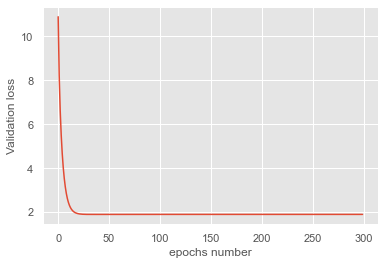

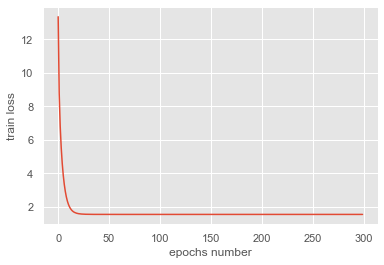

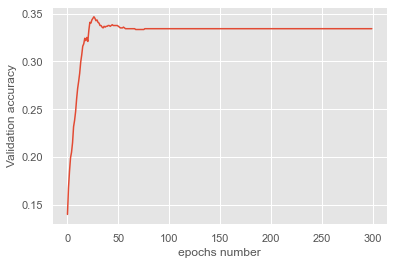

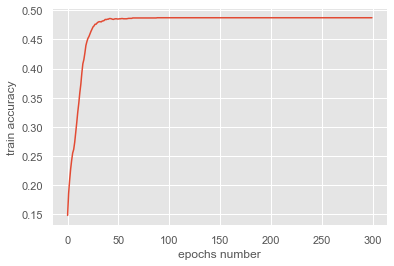

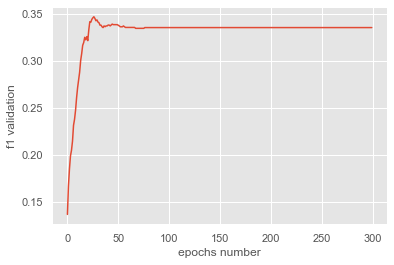

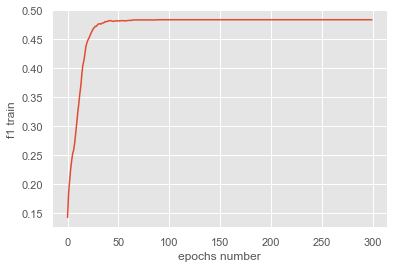

In [316]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
import seaborn as sns

ax = sns.lineplot(x=list(range(n_epochs)), y=list( val_f1))
plt.xlabel("epochs number")
plt.ylabel("f1 validation")
plt.show()


ax = sns.lineplot(x=list(range(n_epochs)), y=list( train_f1))
plt.xlabel("epochs number")
plt.ylabel("f1 train")
plt.show()
ax = sns.lineplot(x=list(range(n_epochs)), y=list(val_losses))
plt.xlabel("epochs number")
plt.ylabel("Validation loss")
plt.show()

ax = sns.lineplot(x=list(range(n_epochs)), y=list(train_losses))
plt.xlabel("epochs number")
plt.ylabel("train loss")
plt.show()
ax = sns.lineplot(x=list(range(n_epochs)), y=list(val_accs))
plt.xlabel("epochs number")
plt.ylabel("Validation accuracy")
plt.show()

ax = sns.lineplot(x=list(range(n_epochs)), y=list(train_accs))
plt.xlabel("epochs number")
plt.ylabel("train accuracy")
plt.show()



In [317]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################

total_loss = 0
N = 0
confusion = np.zeros((10, 10))
with tqdm.tqdm(enumerate(test_sampler), total=len(test_sampler)) as pbar:
    for i, (x, y) in pbar:
        #################################
        ##          Your Code          ##
        #################################
        mf = best_model._forward(x)
        total_loss+=x.shape[0]*criterion._forward(mf, y )
        update_confusion_matrix(confusion , np.argmax(mf,axis=1) , y)
        acc = sum(confusion.diagonal())/np.sum(confusion)
        f1 = f1_score(confusion)
        N+=x.shape[0]
        pbar.set_description(f'Test  | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')

Test  | Loss:1.87e+00 | Acc: 0.36| F1: 0.36|: 100%|██████████| 10/10 [00:00<00:00, 67.96it/s]


## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

In [318]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 5

